# Clasificación de Agua Potable Utilizando Redes Neuronales Artificiales

Alumno: Irving Daniel Estrada López

Matrícula: 1739907

La descripción de cada una de las secciones es un fragmento de lo documentado en el artículo final. En caso de profundizar en justificación, revisar dicho artículo.

## Carga de Datos

El conjunto de datos con el que se trabajará en este articulo es de dominio publico y fue obtenido de Kaggel. Nuestro conjunto de datos contiene 3,276 registros de diferentes cuerpos de agua, está compuesto de 10 variables las cuales se explicarán a continuación, donde 9 de estas variables son de predicción, las cuales son parámetros que hay que tomar en cuenta al momento de clasificar el agua potable, y nuestra variable de respuesta es la potabilidad del agua.

In [192]:
import pandas as pd
import numpy as np

In [193]:
df = pd.read_csv('/Users/irvingestrada/Documents/Maestría/7- Aprendizaje Profundo/Datasets/water_potability.csv')

In [194]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [195]:
np.shape(df)

(3276, 10)

## Análisis Exploratorio y Pre-procesado

In [196]:
print('Number of null values in different columns are: ')
print('--------------------------------------------------')
print(df.isna().sum())
print('--------------------------------------------------')

Number of null values in different columns are: 
--------------------------------------------------
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
--------------------------------------------------


In [197]:
# df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
# df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
# df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [198]:
df = df.dropna()

In [199]:
np.shape(df)

(2011, 10)

In [200]:
print('Number of null values in different columns are: ')
print('--------------------------------------------------')
print(df.isna().sum())
print('--------------------------------------------------')

Number of null values in different columns are: 
--------------------------------------------------
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
--------------------------------------------------


In [201]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [202]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)

In [226]:
#df.groupby("Potability").count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1200,1200,1200,1200,1200,1200,1200,1200,1200
1,811,811,811,811,811,811,811,811,811


In [206]:
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [211]:
print('Tamaño de Conjunto de entrenamiento: {}'.format(len(X_train)))
print('Tamaño de Conjunto de prueba: {}'.format(len(X_test)))

Tamaño de Conjunto de entrenamiento: 1809
Tamaño de Conjunto de prueba: 202


## Red Neuronal
Nuestra red neuronal consta de 9 neuronas en nuestra capa de entrada las cuales son las que reciben nuestros 9 atributos con los que predeciremos si nuestro registro es potable o no. Tenemos una capa oculta con 20 neuronas, se hicieron diversas pruebas en la cantidad de neuronas para obtener el mejor resultado, una de las pruebas fueron con el método de Shibata and Ikeda


$$
N_h = \sqrt{N_i N_o}
$$ 


y otra prueba con el método Sheela and Deepa 
$$
N_h = \frac{4N_i^2 + 3}{N_i^2-8}
$$

que estos presentaban buenos resultados con conjuntos de datos pequeños en otro estudio. Sin embargo, se encontró un estudio previo del análisis del agua potable en el que se hacen distintas pruebas con diferentes números de neuronas y 20 neuronas fueron las que obtuvieron buenos resultados, superando los métodos previos de selección de numero de neuronas. En nuestra capa de salida tenemos una neurona la cual nos provee una probabilidad de la potabilidad del agua. También cabe mencionar que utilizamos el algoritmo de optimización Adam debido a que este tiene una tasa de aprendizaje dinámica brindando mejores resultados que un algoritmo de optimización que tenga tasa fija como el SGD.

In [212]:
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [213]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",
                               mode = 'auto',
                               patience=15)

In [214]:
# define model
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=9))
model.add(layers.Dense(1))

In [215]:
opt = keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])



In [216]:
history = model.fit(X_train, y_train, batch_size=75, epochs=300, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/300
23/25 [==========================>...] - ETA: 0s - loss: 0.2763 - accuracy: 0.5072

2022-03-30 11:49:40.738787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 10ms/step - loss: 0.2769 - accuracy: 0.5069 - val_loss: 0.2522 - val_accuracy: 0.5792
Epoch 2/300
25/25 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.5373 - val_loss: 0.2507 - val_accuracy: 0.5644


2022-03-30 11:49:40.997505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2541 - accuracy: 0.5417 - val_loss: 0.2471 - val_accuracy: 0.5842
Epoch 4/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2517 - accuracy: 0.5401 - val_loss: 0.2453 - val_accuracy: 0.5990
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5473 - val_loss: 0.2444 - val_accuracy: 0.5941
Epoch 6/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.5467 - val_loss: 0.2422 - val_accuracy: 0.5842
Epoch 7/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.5484 - val_loss: 0.2418 - val_accuracy: 0.5842
Epoch 8/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.5705 - val_loss: 0.2427 - val_accuracy: 0.5891
Epoch 9/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2466 - accuracy: 0.5478 - val_loss: 0.2407 - val_accuracy: 0.5792
Epoch 10/300


Epoch 61/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2316 - accuracy: 0.6164 - val_loss: 0.2284 - val_accuracy: 0.6436
Epoch 62/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.6241 - val_loss: 0.2269 - val_accuracy: 0.6535
Epoch 63/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.6219 - val_loss: 0.2272 - val_accuracy: 0.6485
Epoch 64/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2301 - accuracy: 0.6213 - val_loss: 0.2266 - val_accuracy: 0.6535
Epoch 65/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2298 - accuracy: 0.6164 - val_loss: 0.2269 - val_accuracy: 0.6535
Epoch 66/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2299 - accuracy: 0.6269 - val_loss: 0.2260 - val_accuracy: 0.6386
Epoch 67/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.6197 - val_loss: 0.2271 - val_accuracy: 0.6485
Epoch 

25/25 [==============================] - 0s 5ms/step - loss: 0.2036 - accuracy: 0.6965 - val_loss: 0.2026 - val_accuracy: 0.6980
Epoch 176/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2032 - accuracy: 0.6926 - val_loss: 0.2048 - val_accuracy: 0.6733
Epoch 177/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2037 - accuracy: 0.6938 - val_loss: 0.2022 - val_accuracy: 0.7030
Epoch 178/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.7015 - val_loss: 0.2022 - val_accuracy: 0.6980
Epoch 179/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.6949 - val_loss: 0.2019 - val_accuracy: 0.7030
Epoch 180/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2042 - accuracy: 0.6904 - val_loss: 0.2033 - val_accuracy: 0.6832
Epoch 181/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.7020 - val_loss: 0.2031 - val_accuracy: 0.6881
Epoch 182/300

## Resultados

In [175]:
import matplotlib.pyplot as plt

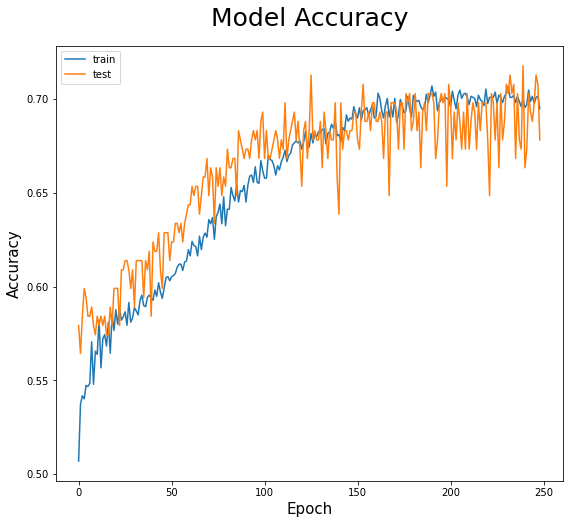

In [217]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

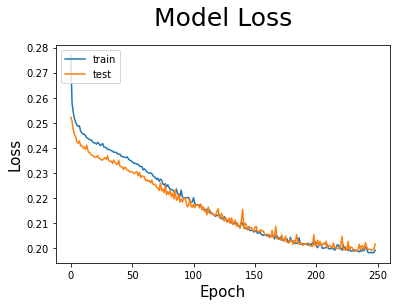

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

2022-03-30 10:42:01.264984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [179]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

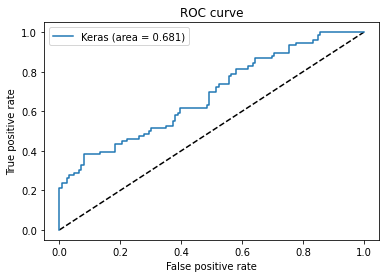

In [180]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [181]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [184]:
import seaborn as sns

Text(0.5, 15.0, 'Predicted label')

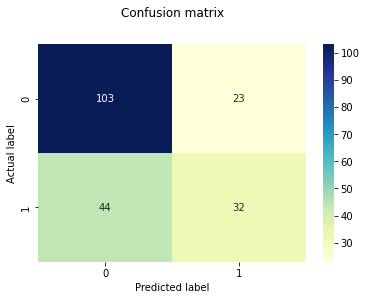

In [185]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')